<a href="https://colab.research.google.com/github/DiegoRInacio/Analise_de_dados/blob/main/Palestra_Faculdade_Vassouras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Palestra na Faculdade de Vassouras Unidade de Maricá - RJ

  - Palestrante: **Diego Ramos Inácio**

  - Palestra **Data Sciense aplicado à informação Geográfica**

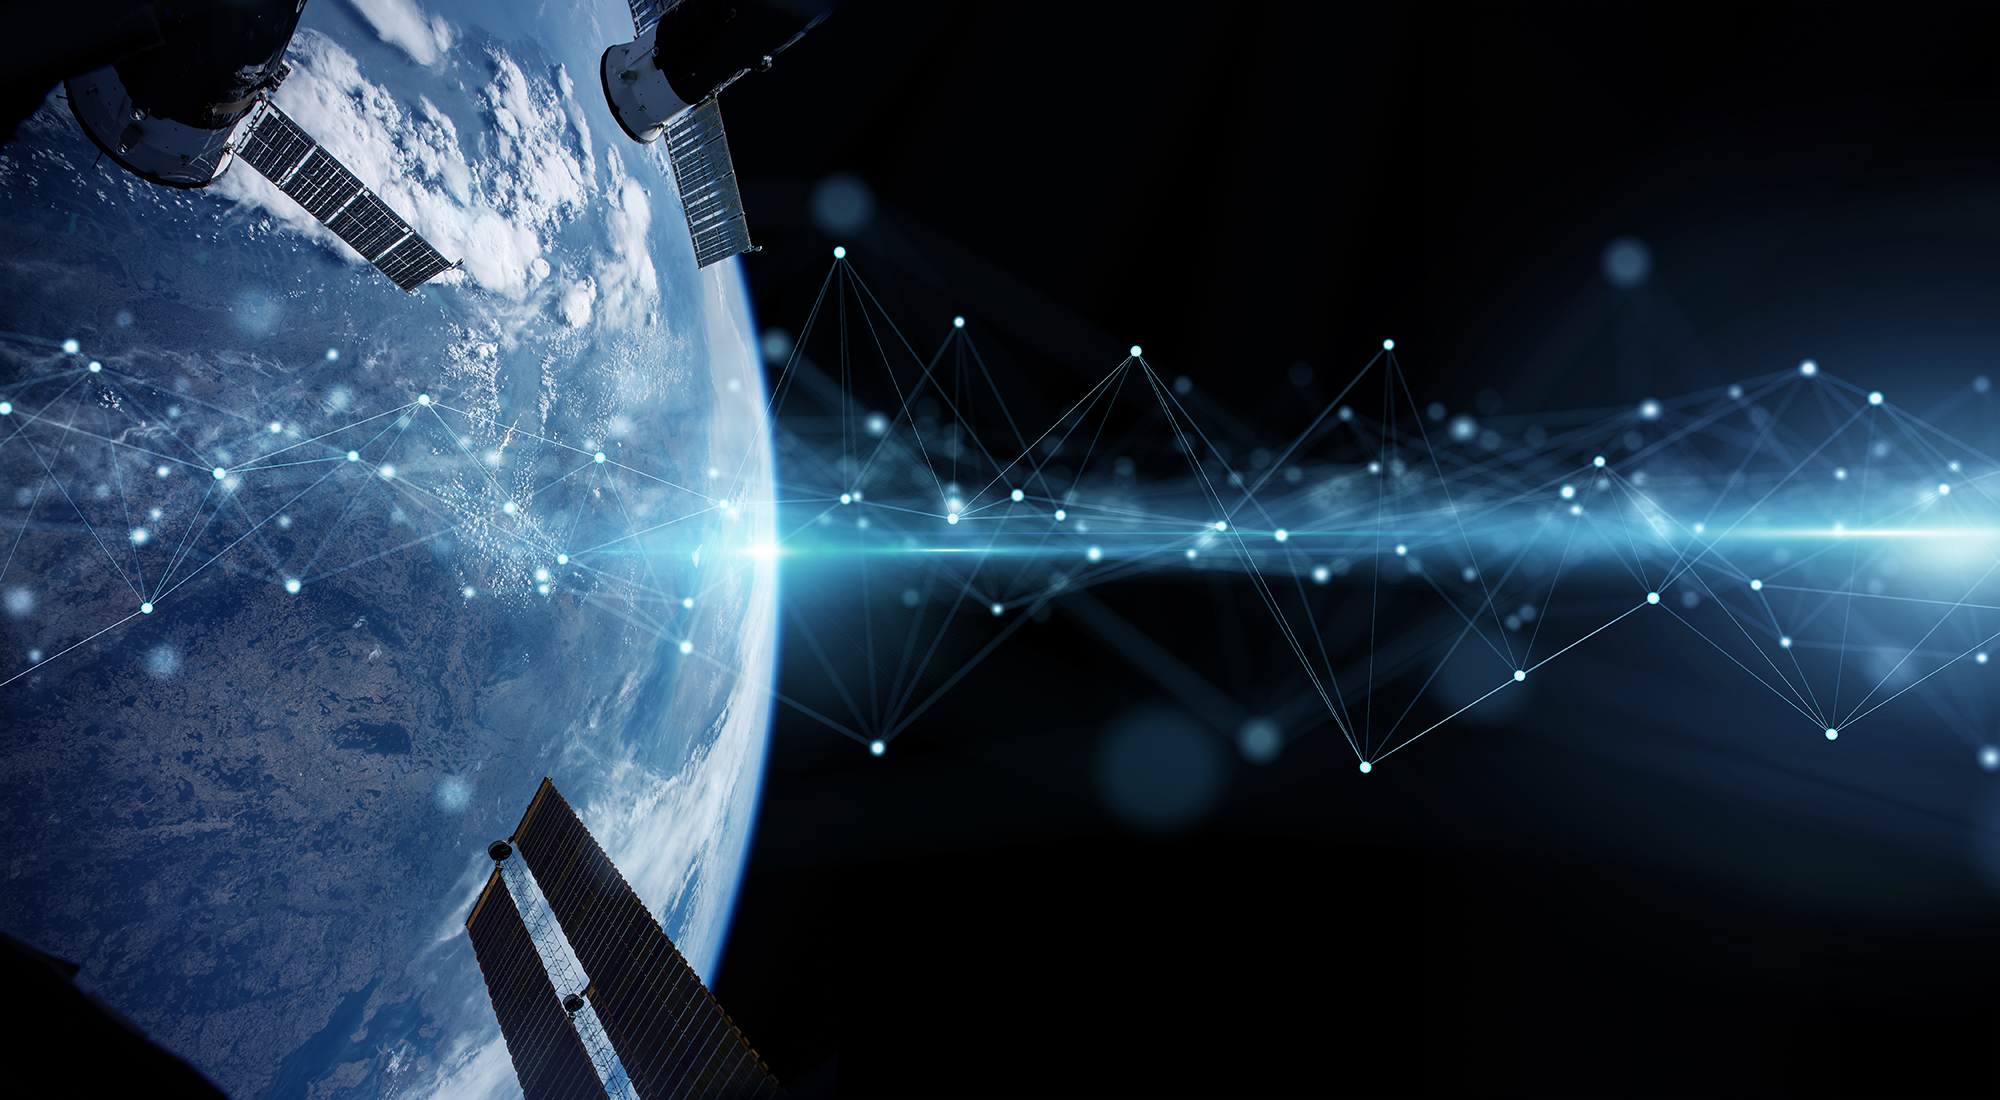

In [ ]:
!pip install geopandas
!pip install folium

     |████████████████████████████████| 1.0 MB 12.8 MB/s 
     |████████████████████████████████| 16.7 MB 64.0 MB/s 
     |████████████████████████████████| 6.3 MB 45.3 MB/s 


***
### Bibliotécas usadas

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

#Para segunda etapa
from shapely.geometry import Point, LineString, Polygon

#Para terceira etapa
from shapely import geometry

#Para quarta e ultima parte
import folium
from folium.plugins import FastMarkerCluster, HeatMap
from pyproj.crs import crs

# Uma das questões mais importantes é como baixar dados geoespaciais o potenciais dados que possam ser espacializados
***
Visando atender essa etapa vamos usar os dados do Estado do Rio de Janeiro.

Esses dados dos limites municipais podem ser encontrados no **catalogo do IBGE**: [Malha Municipal](https://www.ibge.gov.br/geociencias/organizacao-do-territorio/malhas-territoriais/15774-malhas.html?=&t=downloads) 

Os dados do OTT podem ser baixados no seguinte link: [MPRJ / OTT Ocorrências](https://docs.google.com/spreadsheets/d/1FOZnK0-rwJ68AxQIwRVEtiYaAOYFdtdv/edit?usp=sharing&ouid=107995328962500796430&rtpof=true&sd=true)

Após realizar o download dos dados descompacte em uma pasta "de facil acesso"

Nessa pasta vamos ter um conjunto de arquivo SHP
***
## Como ler um arquivo *shapefile*?

O geopandas lê varios arquivos diferente como SHP, KMZ, GeoJeson, Gepkg entre outros arquivos de atributos espaciais.

In [ ]:
munic_BR = gpd.read_file('/content/drive/MyDrive/@EquipeGEO/zz.Bases/IBGE/Brasil/Municipios do Brasil/BR_Municipios_2019.shp')

#verificando se a variavel foi gravada
munic_BR.head()

In [ ]:
#Verificando o tipo da variável
type(munic_BR)

In [ ]:
#Analisando a dimensão desse dataset
lines = munic_BR.shape[0]
coluns= munic_BR.shape[1]

print('Esse dataset possuí:\n'
    '{} colunas e\n'
    '{} linhas'.format(coluns, lines))

### Agora vamos iniciar a visualização dos dados

com plotagem de mapas

In [ ]:
munic_BR.plot()

##### Vamos melhorar essas plotagem com parametros

In [ ]:
from pandas.core.algorithms import factorize
munic_BR.plot(figsize = (16, 14), facecolor = 'white', edgecolor = 'black')

plt.show()

### Realizando filtros no dataset

Vantagens da herança do Pandas

In [ ]:
#Filtrando para o Estado do Rio de Janeiro
munic_ERJ = munic_BR[munic_BR['SIGLA_UF'] == 'RJ']

munic_ERJ.head()

In [ ]:
#Plotando o mapa
munic_ERJ.plot(figsize = (16, 14), facecolor = 'white', edgecolor = 'black')

plt.show()

In [ ]:
#Filtrando para o município de Maricá
munic_Marica = munic_ERJ[munic_ERJ['NM_MUN'] == 'Maricá']

munic_Marica.plot(figsize = (16, 14), facecolor = 'white', edgecolor = 'black')

plt.show()

### Ta certo trabalhamos na limpeza dos dados agora temos que salvar esses dados na nuvem ou em um disco rigido local.

Eai como podemos realiza essa taréfa?

In [ ]:
munic_Marica.to_file('/content/drive/MyDrive/Trabalho Voluntario/Solicitações/Faculdade de Vassouras Maricá/Resultados/shp/Limite_Marica.shp')
munic_ERJ.to_file('/content/drive/MyDrive/Trabalho Voluntario/Solicitações/Faculdade de Vassouras Maricá/Resultados/shp/Municipios_ERJ.shp')

### Vamos deixar essas variáveis gravas porque mais para frente vamos precisar delas
***
## Agora vamos supor que queremos criar no nosso próprio shp ou outro arquivo que seja.

Vamos fazer isso usando a bibliotéca shapely.geometry

Com as formas geométricas:
  - Point = Ponto
  - LineString = Linhas
  - Polygon = Polígonos
***
### Vamos iniciar com pontos

Os Pontos podem possuír duas ou três cordenadas
      
      X, Y e Z

Um ponto pode se diferencair bidimenssional ou tridimencional.

  - Bidimenssional: possui apenas X e Y
  - Tridimenssional: Possuí X, Y e Z
    - A coordenada Z refere-se a informação altimétrica

In [ ]:
#criando variável ponto

FV = Point(724306.54, 7463978.90)

FV

### Agora vamos imprimir e ver o tipo da variável

In [ ]:
print(FV)

In [ ]:
type(FV)

### Assim como qualquer outra forma espacial, os pontos possuem funções e atributo

    Funções = Medir distância entre um local e outro
    Atribuição = Caracteristica/informação do tipo relacional

Vamos descobrir as coordenadas, caso isso fosse uma surpresa para nós!

In [ ]:
list(FV.coords)

In [ ]:
ponto_X = FV.x
ponto_Y = FV.y

print('O ponto denominado de "ponto" possuí as seguintes coordenadas:\n'
    'A coordenada X é {}\n'
    'E a coordenada Y é {}'.format(ponto_X, ponto_Y))

### Podemos calcular a distância entre dois ponto da seguinte forma

In [ ]:
#Vamos criar mais pontos

Entrada_Marica = Point(709698.10, 7466015.94)
Barra_M = Point(723471.86, 7459106.90)

distancia = Entrada_Marica.distance(Barra_M)

print('A distância entre ou ponto 1 e 2 é de: {:.3f}'.format(distancia))

***
### Vamos Criar objetos de linha agora

In [ ]:
#Vamos realizar a linha com os três pontos que já temos

linha = LineString([Entrada_Marica, Barra_M, FV])

linha

In [ ]:
print(linha)

In [ ]:
type(linha)

### Os atributos da geometria do tipo linha

In [ ]:
list(linha.coords)

In [ ]:
linha.xy

### Nós também podemos escolher qual será o atributo que queremos

No caso se é X ou Y e até mesmo se tivessemos o Z

In [ ]:
coord_X = list(linha.xy[0]) # só trás coordenadas X
coord_Y = list(linha.xy[1]) # só trás coordenadas Y

print(
    'As coordenadas X da linha são: {}\n'
    'As coordenadas Y da linha são: {}'.format(coord_X, coord_Y)
)

### Vamos ver o tamanho da linha

In [ ]:
linha.length

In [ ]:
Lagoa_Jacone = Point(741851.05, 7462351.28)

pol = Polygon([Entrada_Marica, Barra_M, Lagoa_Jacone, FV])

pol

In [ ]:
print(pol)

In [ ]:
type(pol)

### sobre os atributos dos poligonos

In [ ]:
list(pol.exterior.coords)

In [ ]:
area_Pol = pol.area

print('A área definida possuí: \n{:.2f}m²\n'
    '{:.2f} km²\n'
    '{:.2f} ha'.format(area_Pol, area_Pol/1000, area_Pol/10000)
)

### Agora vamos realizar limpeza de dados para isso vamos trabalhar com dados do OTT retirados no Ministério Publico do Estado do Rio de Janeiro - MPRJ

In [ ]:
dados_ott = '/content/drive/MyDrive/Trabalho Voluntario/Solicitações/Faculdade de Vassouras Maricá/Tabela/colaborativo_ott.xlsx'

ocorr_ott = pd.read_excel(dados_ott)

In [ ]:
ocorr_ott.head()

### Precisamos observa se existem colunas LAT e LONG

In [ ]:
ocorr_ott.columns

### Verificar se existem dos nulos

In [ ]:
print('A unica coluna que possuí dados nulos é a coluna LOCALIDADE\n'
    'O que é bom porque não poderiamos ter dados nulos em LAT e LONG\n\n',
    '-' * 100,'\n',
    ocorr_ott.isnull().sum())

Como podemos notar nosso dataset já vem com a coluna geometry sendo assim vamos dropar essa coluna

In [ ]:
ocorr_ott = ocorr_ott.drop('geom', axis = 1)

In [ ]:
ocorr_ott.columns

Agora vamos criar uma coluna geometry

In [ ]:
ocorr_ott[['geometry']] = None

for i, row in ocorr_ott.iterrows():
  ocorr_ott.loc[i, 'geometry'] = Point(row.longitude, row.latitude)

In [ ]:
ocorr_ott[['geometry']]

### Agora vamos transforma esse dataset em um dataset no geopandas

In [ ]:
Geo_ocorr_ott = gpd.read_file('/content/drive/MyDrive/Diego Faculdade/Estudos sobre DataSciense/shp/ocorrencias_ERJ_reprojetado_SIRGAS2000.shp')

Geo_ocorr_ott. head()

### Vamos plotar esse mapa antes de partir para próxima e ultima etapa

In [ ]:
flg, ax = plt.subplots(figsize = (10, 10))
plt.title('Mapa das ocorrências do OTT, nos anos de 2018 e 2019')

Geo_ocorr_ott.plot(ax = ax)
munic_ERJ.plot(ax = ax, facecolor = 'None', edgecolor = 'black')

plt.show()

### Quarta e ultima parte vamos trabalhar com maps interativos após termos realizados todas as análises de dados e verificações/filtros e calculos

Definindo mapa base

In [ ]:
mapb = folium.Map()

mapb

Já temos uma mapa base e ele é interativo!
***
### Como iniciar o mapa exatamento na área pretendida

In [ ]:
media_lat = Geo_ocorr_ott['latitude'].mean()
media_long = Geo_ocorr_ott['longitude'].mean()

mapb = folium.Map(location = [media_lat, media_long])

feat_geojson = folium.features.GeoJson(Geo_ocorr_ott)

mapb.add_child(feat_geojson)

mapb

### Elaboração de cluster

In [ ]:
from geopandas.geodataframe import GeoDataFrame
mapb = folium.Map(location = [media_lat, media_long])

locais = Geo_ocorr_ott[['latitude', 'longitude']].values.tolist()

limite = folium.features.GeoJson(munic_ERJ,
                                 style_function=lambda featura: {
                                     'color': 'black',
                                     'weght': 2,
                                     'fillOpacity': 0.0
                                 })

render = FastMarkerCluster(data = locais)

mapb.add_child(render)

mapb

### Agora uma mapa de calor

In [ ]:
mapb = folium.Map(location=[media_lat, media_long],tiles = 'cartodbpositron')

locais = Geo_ocorr_ott[['latitude', 'longitude']].values.tolist()

limite = folium.features.GeoJson(munic_ERJ,
                                 style_function=lambda featura: {
                                     'color': 'black',
                                     'weght': 2,
                                     'fillOpacity': 0.0
                                 })

heatmap = HeatMap(data=locais)

mapb.add_child(heatmap)

Como salvar meu dados na nuvem ou em um servido ou disco rigido local?

In [ ]:
#Para salvar os resultados

#Faça isso para salvar o HTML de cada etapa

mapb.save('#digiti aqui o caminha da pasta que quer salvar o arquivo.html')